In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import decimal
import scipy

In [ ]:
##### ES 1 ######

def func(N, vander=False, hilbert=False):
  if vander:
    x_input = np.arange(1, N+1, 1)
    A = np.vander(x_input, N=N)
  elif hilbert:
    A = scipy.linalg.hilbert(N)
  else:
    A = np.random.rand(N,N)
  x_true = np.ones(N)
  b = A @ x_true
  cond_2 = np.linalg.cond(A, p=2)
  cond_inf = np.linalg.cond(A, p=np.inf)
  x = np.linalg.solve(A, b)
  err_rel = np.linalg.norm((x-x_true), 2) / np.linalg.norm((x_true), 2)
  return err_rel, cond_2, cond_inf

In [ ]:
def render(nums, vander=False, hilbert=False):
  errs = []
  cond_2_list = []
  cond_inf_list = []
  for n in nums:
    res = func(n, vander, hilbert)
    errs.append(res[0])
    cond_2_list.append(res[1])
    cond_inf_list.append(res[2])
  if not vander and not hilbert:
    matrix_name = "Random matrix"
  elif vander:
    matrix_name = "Vander matrix"
  else:
    matrix_name = "Hilbert matrix"

  # Create a new window for the relative errors graph
  plt.figure(1, figsize=(4, 3))
  plt.plot(nums, errs, marker='o', linestyle='-')
  plt.title(f'Relative Errors vs. n in {matrix_name}')
  plt.xlabel('n')
  plt.ylabel(f'Relative Error in {matrix_name}')
  plt.grid(True)

  # Create a new window for the condition numbers graph
  plt.figure(2, figsize=(4, 3))
  plt.plot(nums, cond_2_list, label='K2(A)', marker='o', linestyle='-', color='blue')
  plt.plot(nums, cond_inf_list, label='K∞(A)', marker='x', linestyle='--', color='red')
  plt.title(f'Condition Numbers vs. n in {matrix_name}')
  plt.xlabel('n')
  plt.ylabel(f'Condition Number in {matrix_name}')
  plt.legend()
  plt.grid(True)

  plt.show()

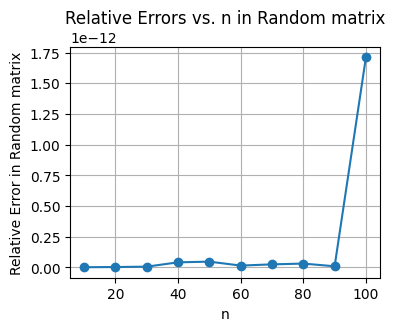

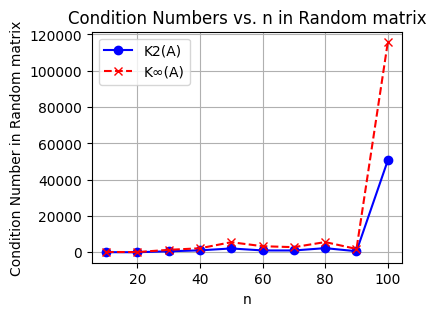

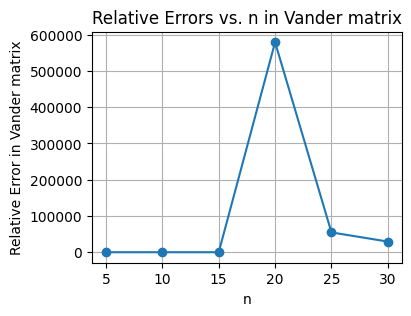

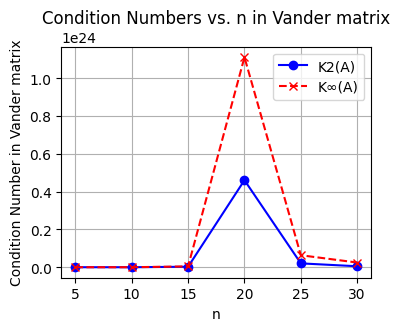

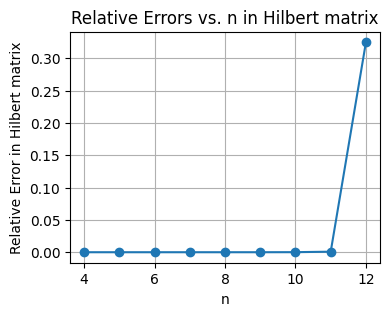

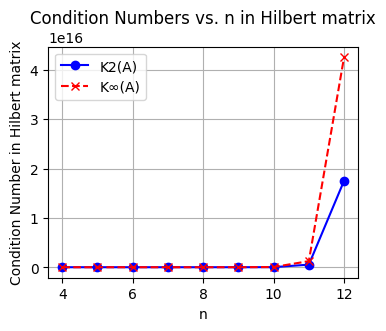

In [ ]:
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
nums2 = [5, 10, 15, 20, 25, 30]
nums3 = [4, 5, 6, 7, 8, 9, 10, 11, 12]

render(nums)
render(nums2, vander=True)
render(nums3, hilbert=True)

In [ ]:
### ES 2.1 ######
res = 1 + 0.000000000000000111021
print(decimal.Decimal.from_float(res-1))
print(decimal.Decimal.from_float((0.00000000000000012)*2))
print(decimal.Decimal.from_float((0.00000000000000011)*2))
print(decimal.Decimal.from_float(((0.00000000000000012)*2)-((0.00000000000000011)*2)))
res = 1 + 0.00000000000000011
print(decimal.Decimal.from_float(res-1))
print(decimal.Decimal.from_float(np.finfo(float).eps))

0
2.4000000000000000484423012903095242248847465183804461563710219706990756094455718994140625E-16
2.20000000000000000331893736918936567428348820003695951452726831121253781020641326904296875E-16
2.0000000000000004512336392112015855060125831834348664184375365948653779923915863037109375E-17
0
2.220446049250313080847263336181640625E-16


In [ ]:
eps = 1
while float(1+eps) > 1:
  eps = eps/2
print(decimal.Decimal.from_float(eps*2))

2.220446049250313080847263336181640625E-16


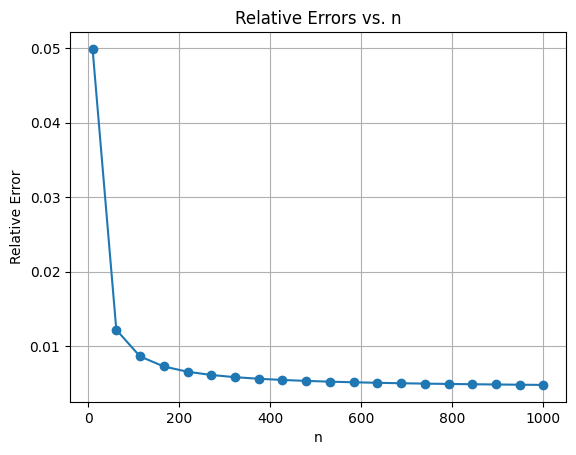

[2.5937424601000023, 2.6967154802332267, 2.706476238016249, 2.710154562749155, 2.712085256790405, 2.7132747306754763, 2.714081090596594, 2.7146637569721506, 2.7151044741610977, 2.7154494821692143, 2.7157269045457983, 2.715954829232462, 2.716145418314656, 2.716307151049592, 2.7164461197698504, 2.7165668145643935, 2.716672617508565, 2.7167661245823855, 2.7168493615203633, 2.7169239322355936]
[0.04991118677655593, 0.012192131782700831, 0.008616762631410684, 0.00726939093437545, 0.006562176999851635, 0.006126472280045301, 0.005831102345569968, 0.00561767143877268, 0.0054562365710264845, 0.005329860011276794, 0.005228240093114152, 0.005144751196900438, 0.005074938346279908, 0.00501569558623004, 0.004964791293095086, 0.00492058074564339, 0.004881825088437669, 0.004847573413045586, 0.0048170836921746195, 0.004789768411870475]


In [ ]:
##### ES 2.2 ######

res = []
err = []
e = 2.73
nums = np.linspace(10, 1000, 20)

for n in nums:
  a = (1+1/n)**n
  res.append(a)
  err.append((e-a)/e) # ??

plt.figure(1)
plt.plot(nums, err, marker='o', linestyle='-')
plt.title('Relative Errors vs. n')
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.grid(True)
plt.show()

print(res)
print(err)


In [ ]:
##### ES 2.3 ######

A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])
rank_a = np.linalg.matrix_rank(A)
rank_b = np.linalg.matrix_rank(B)
print(rank_a, rank_b)
eigenvalues_a, eigenvectors_a = np.linalg.eig(A)
eigenvalues_b, eigenvectors_b = np.linalg.eig(B)
print(eigenvalues_a, eigenvalues_b)
print(eigenvectors_a)
print(eigenvectors_b)

2 1
[5. 2.] [5. 0.]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
